# Linear Regression

In [ ]:
import torch
from torch import nn ## nn contains building blocks
import matplotlib.pyplot as plt

torch.__version__


'1.13.1+cu116'

In [ ]:
# Create *known* parameter
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.3000],
         [0.3140],
         [0

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(len(X)*0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

In [ ]:
def plt_(train_data = X_train, 
         train_label = y_train, 
         test_data = X_test,
         test_label = y_test,
         predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")
  plt.scatter(test_data, test_label, c = "g", s = 4, label = "Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
  plt.legend(prop = {"size":14})



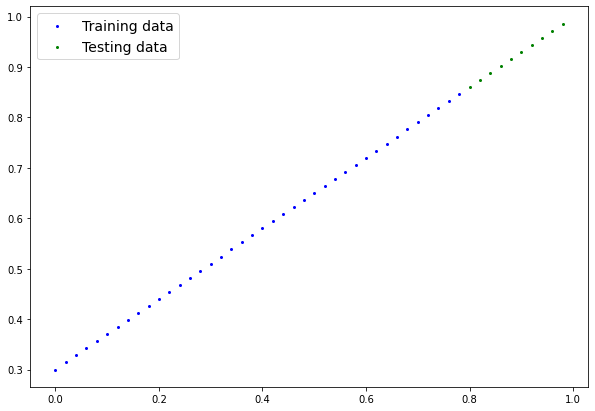

In [ ]:
plt_()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# Preprocessing data: torch.transforms, torch.utils.data.Dataset, torch.utils.data.Dataloader
# Build model: torch.nn, torch.nn.Module, torchvision.models
# Model evaluate: torchmetrics
# Improve: torch.utils.tensorboard


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

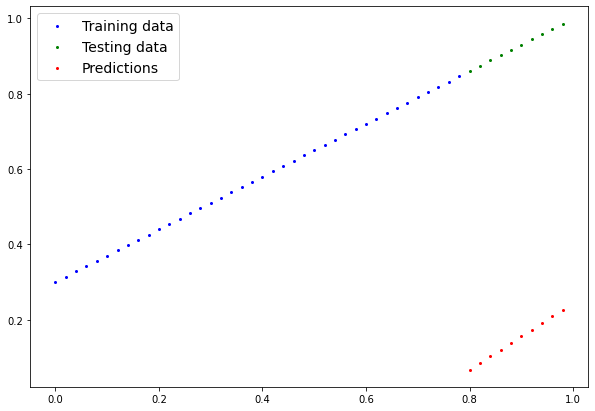

In [ ]:
plt_(predictions = y_preds)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 1e-4)

In [ ]:
epochs = 10000
epoch_count = []
loss_values = []
test_loss_values =  []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss : {test_loss}")


Epoch: 0 | Loss: 0.8670692443847656 | Test Loss : 0.7757998704910278
Epoch: 100 | Loss: 0.855547308921814 | Test Loss : 0.7623288035392761
Epoch: 200 | Loss: 0.8440253138542175 | Test Loss : 0.748857855796814
Epoch: 300 | Loss: 0.8325034379959106 | Test Loss : 0.7353867292404175
Epoch: 400 | Loss: 0.820981502532959 | Test Loss : 0.7219158411026001
Epoch: 500 | Loss: 0.8094595074653625 | Test Loss : 0.7084447741508484
Epoch: 600 | Loss: 0.7979375123977661 | Test Loss : 0.6949738264083862
Epoch: 700 | Loss: 0.786415696144104 | Test Loss : 0.6815026998519897
Epoch: 800 | Loss: 0.7748937606811523 | Test Loss : 0.6680318117141724
Epoch: 900 | Loss: 0.7633718252182007 | Test Loss : 0.6545607447624207
Epoch: 1000 | Loss: 0.7518497705459595 | Test Loss : 0.6410897970199585
Epoch: 1100 | Loss: 0.7403279542922974 | Test Loss : 0.627618670463562
Epoch: 1200 | Loss: 0.7288059592247009 | Test Loss : 0.6141477823257446
Epoch: 1300 | Loss: 0.7172839641571045 | Test Loss : 0.6006767153739929
Epoch: 14

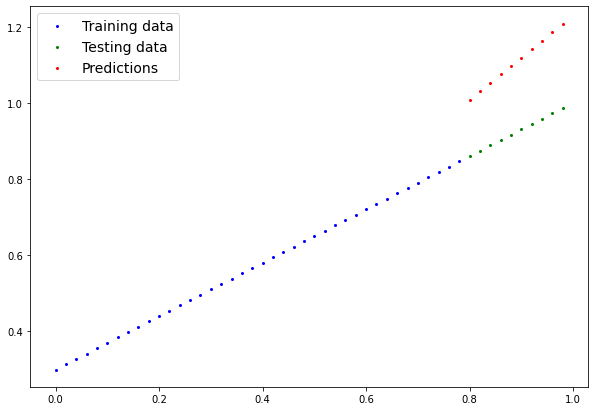

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plt_(predictions = y_preds)

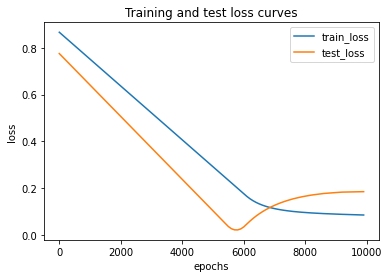

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "train_loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label = "test_loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.1133])), ('bias', tensor([0.1169]))])

In [ ]:
model_name = "/linear regression.pth"
Model_PATH = "/content/sample_data" + model_name
torch.save(obj = model_0.state_dict(), f = Model_PATH)


In [ ]:
loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(f=Model_PATH))

<All keys matched successfully>

#Linear Regression V2

In [ ]:
# nn.linear applies a linear transformation to the incoming data y = xA^T + b
class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
train_split = int(len(X)*0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 1e-4)
epochs = 10000
epoch_count = []
loss_values = []
test_loss_values =  []


X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = X_test.to(device)


for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss : {test_loss}")

Epoch: 0 | Loss: 0.5550627112388611 | Test Loss : 0.6201777458190918
Epoch: 100 | Loss: 0.5435407757759094 | Test Loss : 0.6067067980766296
Epoch: 200 | Loss: 0.5320188403129578 | Test Loss : 0.5932357311248779
Epoch: 300 | Loss: 0.5204969644546509 | Test Loss : 0.5797647833824158
Epoch: 400 | Loss: 0.5089749693870544 | Test Loss : 0.5662937164306641
Epoch: 500 | Loss: 0.4974530339241028 | Test Loss : 0.5528227686882019
Epoch: 600 | Loss: 0.4859311282634735 | Test Loss : 0.5393517017364502
Epoch: 700 | Loss: 0.47440919280052185 | Test Loss : 0.525880753993988
Epoch: 800 | Loss: 0.4628872573375702 | Test Loss : 0.5124096870422363
Epoch: 900 | Loss: 0.45136529207229614 | Test Loss : 0.4989387094974518
Epoch: 1000 | Loss: 0.43984338641166687 | Test Loss : 0.48546767234802246
Epoch: 1100 | Loss: 0.4283214509487152 | Test Loss : 0.4719966948032379
Epoch: 1200 | Loss: 0.41679951548576355 | Test Loss : 0.4585256576538086
Epoch: 1300 | Loss: 0.4052775502204895 | Test Loss : 0.44505468010902405

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6696]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3128], device='cuda:0'))])

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds 

tensor([[0.8484],
        [0.8618],
        [0.8752],
        [0.8886],
        [0.9020],
        [0.9154],
        [0.9288],
        [0.9422],
        [0.9556],
        [0.9690]], device='cuda:0')

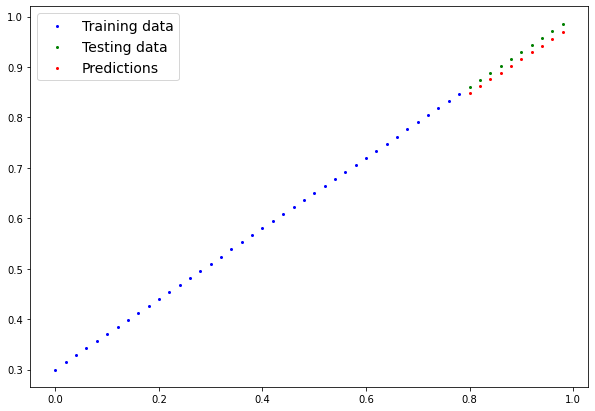

In [ ]:
plt_(predictions = y_preds.cpu())